In [1]:
from gen_ibl import *

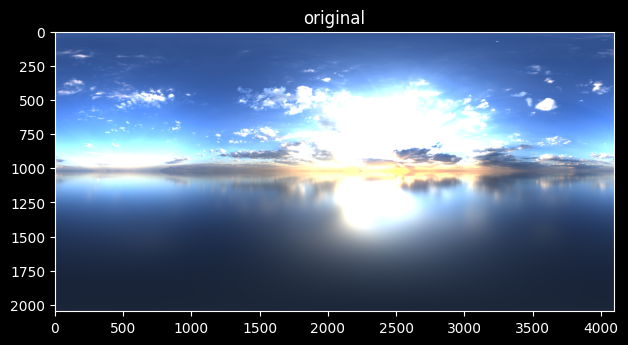

In [2]:
pixels = load_image("kloppenheim_06_puresky_4k.exr")
show_image(pixels, "original")
image = create_image(pixels)

prefilter_irradiance: 100%|██████████| 128/128 [00:00<00:00, 171.67it/s]


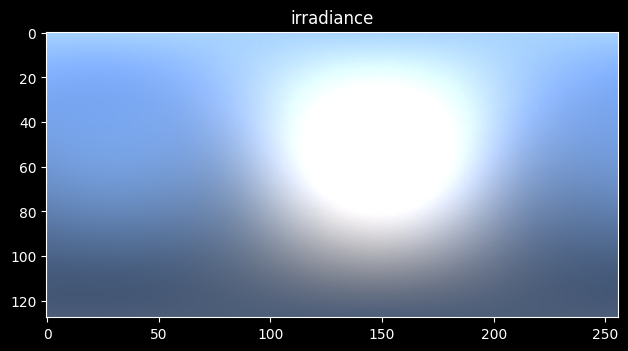

In [3]:
irradiance = prefilter_irradiance(image, Glm.UVec2(256, 128))
dumped = dump_image(irradiance)
show_image(dumped, "irradiance")
save_image("output/irradiance.exr", dumped)

prefilter_radiance(roughness=0.00): 100%|██████████| 512/512 [00:01<00:00, 320.44it/s]


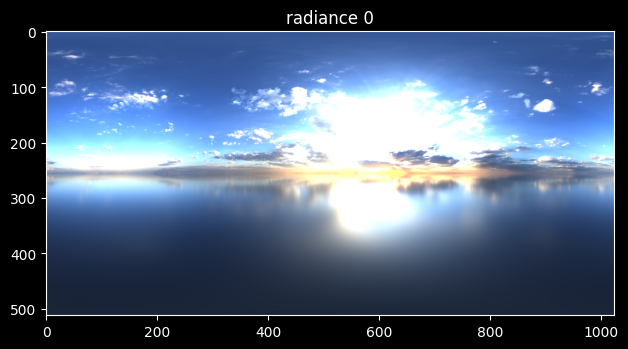

prefilter_radiance(roughness=0.14): 100%|██████████| 256/256 [00:01<00:00, 219.29it/s]


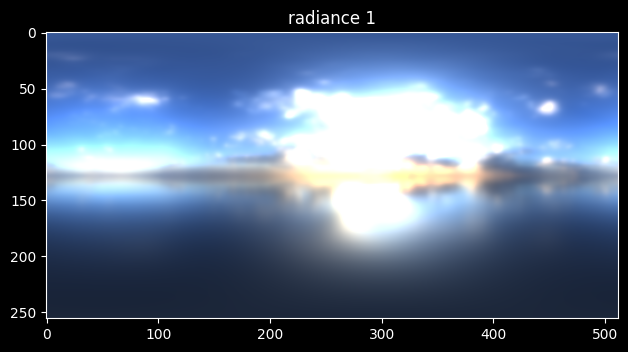

prefilter_radiance(roughness=0.29): 100%|██████████| 128/128 [00:00<00:00, 208.57it/s]


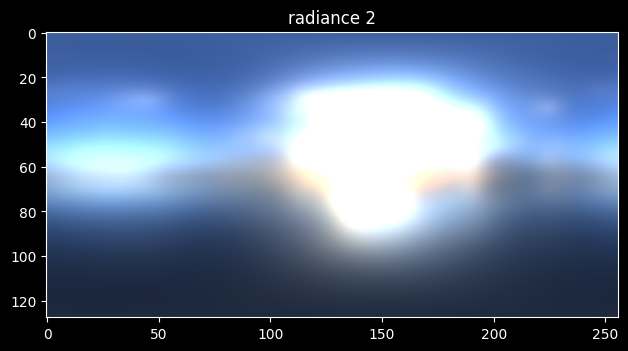

prefilter_radiance(roughness=0.43): 100%|██████████| 64/64 [00:00<00:00, 167.69it/s]


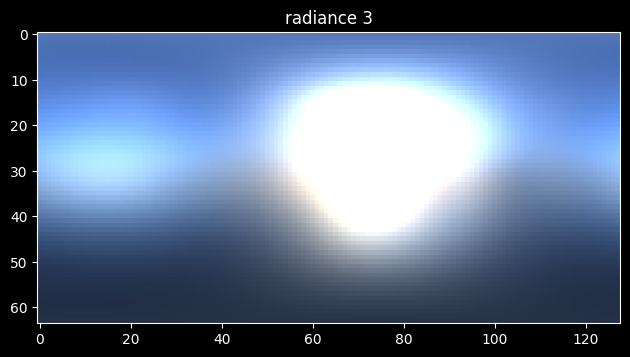

prefilter_radiance(roughness=0.57): 100%|██████████| 32/32 [00:00<00:00, 156.60it/s]


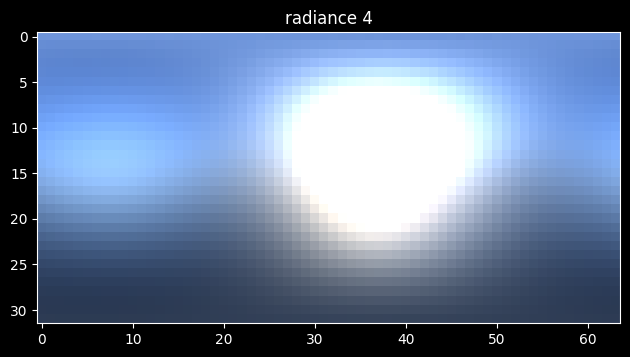

prefilter_radiance(roughness=0.71): 100%|██████████| 16/16 [00:00<00:00, 177.54it/s]


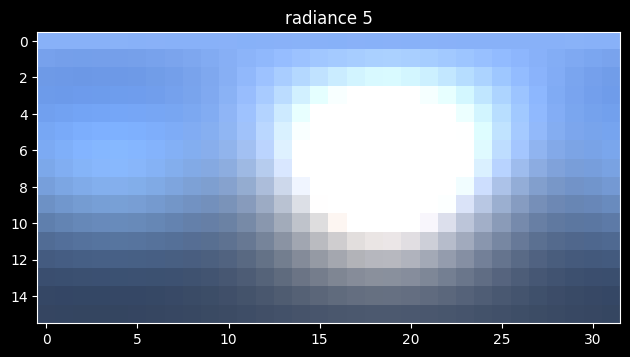

prefilter_radiance(roughness=0.86): 100%|██████████| 8/8 [00:00<00:00, 205.48it/s]


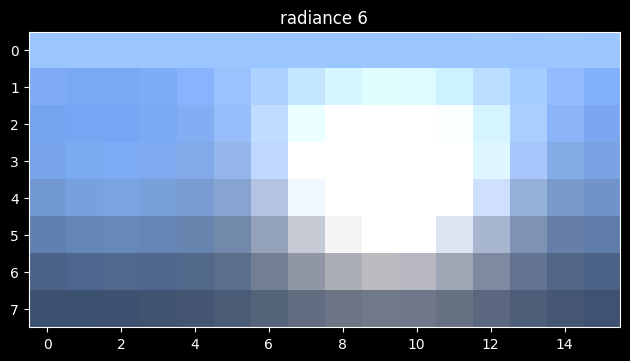

prefilter_radiance(roughness=1.00): 100%|██████████| 4/4 [00:00<00:00, 229.55it/s]


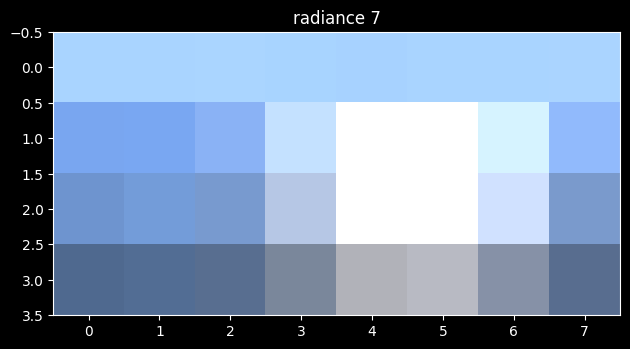

In [4]:
radiance_base_size = Glm.UVec2(1024, 512)
radiance_mip_levels = 8
for i in range(radiance_mip_levels):
    roughness = i / (radiance_mip_levels - 1)
    size = Glm.UVec2(radiance_base_size.x >> i, radiance_base_size.y >> i)
    radiance = prefilter_radiance(image, size, roughness)
    dumped = dump_image(radiance)
    show_image(dumped, f"radiance {i}")
    save_image(f"output/radiance_{i}.exr", dumped)

integrate_brdf: 100%|██████████| 512/512 [00:00<00:00, 983.11it/s]


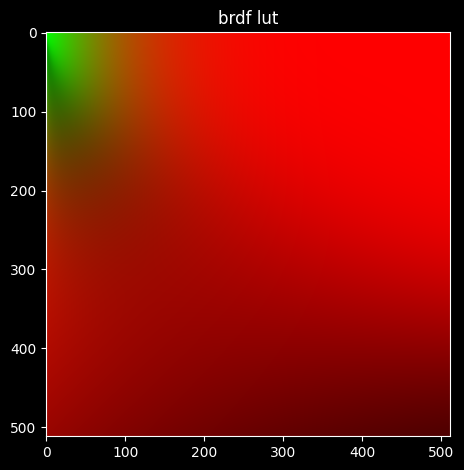

In [5]:
brdf_lut = integrate_brdf(512)
dumped = dump_image(brdf_lut)
show_image(dumped, "brdf lut")
save_image("output/brdf_lut.exr", dumped)

In [6]:
check_images()

checking output\brdf_lut.exr
checking output\irradiance.exr
checking output\radiance_0.exr
checking output\radiance_1.exr
checking output\radiance_2.exr
checking output\radiance_3.exr
checking output\radiance_4.exr
checking output\radiance_5.exr
checking output\radiance_6.exr
checking output\radiance_7.exr
